**Analysis**

In [1]:
# import required libraries
import torch
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from dataset import NPYDataset
from models import Baseline3DCNN
import config

Num samples: 636
Image shape: torch.Size([1, 64, 64, 64]) | Label: 2


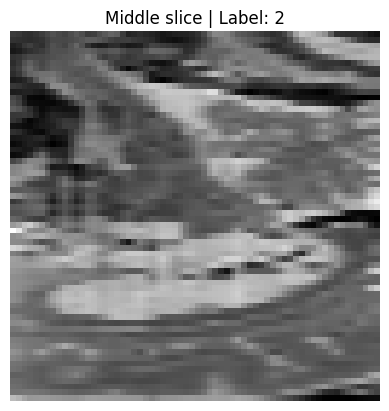

In [2]:
dataset = NPYDataset(config.CSV_PATH)

print("Num samples:", len(dataset))
img, label = dataset[0]
print("Image shape:", img.shape, "| Label:", label.item())

# img shape: (1, D, H, W)
volume = img[0].numpy()  # (D, H, W)
mid_slice = volume[volume.shape[0] // 2]

plt.imshow(mid_slice, cmap="gray")
plt.title(f"Middle slice | Label: {label.item()}")
plt.axis("off")
plt.show()


In [3]:
# load best checkpoint and run inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Baseline3DCNN(num_classes=config.NUM_CLASSES).to(device)

best_path = config.CHECKPOINT_DIR / "best_model.pth"
state_dict = torch.load(best_path, map_location=device)
model.load_state_dict(state_dict)

model.eval()

img, label = dataset[10]
with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))  # add batch dim
    probs = torch.softmax(logits, dim=1).cpu().numpy()[0]

print("True label:", label.item())
print("Predicted probs (AD, MCI, CN):", probs)


True label: 2
Predicted probs (AD, MCI, CN): [0.08610761 0.31924856 0.5946439 ]


In [4]:
from pathlib import Path
import config
run_dir = Path(f"runs/{config.RUN_NAME}")
print(run_dir)

runs\resnet3d18_v3_128


In [5]:
run_dir_2 = Path(f"{config.LOG_DIR}/{config.RUN_NAME}")
print(run_dir_2)


runs\resnet3d18_v3_128


In [6]:
run_dir_3 = config.LOG_DIR / config.RUN_NAME
print(run_dir_3)

runs\resnet3d18_v3_128
